# Dimensionality Reduction

The project’s objective is to explore and demonstrate the effectiveness of PCA and t-SNE in reducing the dimensionality of complex, multimodal data while preserving essential information and enhancing data visualization.

This project will allow you to apply your knowledge of PCA and t-SNE to a real-world scenario and gain valuable experience in dimensionality reduction and data visualization. It’s an opportunity to showcase your skills and creativity in tackling complex data analysis challenges.

## Dimensionality Reduction with PCA

Apply PCA to your record dataset.
Determine the optimal number of principal components to retain.
Visualize the reduced-dimensional data using PCA.
Analyze and interpret the results.

In [556]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from numpy import linalg as LA

In [557]:
record_data = pd.read_csv('../eda/cars-data.csv')

record_data.head()

,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,midsize car,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993
1,1,19,midsize car,22,4.0,2.2,fwd,gas,27,toyota,Camry,m,1993
2,2,16,midsize car,19,6.0,3.0,fwd,gas,22,toyota,Camry,a,1993
3,3,16,midsize car,18,6.0,3.0,fwd,gas,22,toyota,Camry,m,1993
4,4,18,midsize-large station wagon,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993


## Some preliminary cleaning

In [558]:
df = record_data.copy()

In [559]:
nan_count = record_data.isna().sum()

print(nan_count)

Unnamed: 0          0
city_mpg            0
class               0
combination_mpg     0
cylinders          25
displacement       25
drive               3
fuel_type           0
highway_mpg         0
make                0
model               0
transmission        0
year                0
dtype: int64


In [560]:
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       80 non-null     int64  
 1   city_mpg         80 non-null     int64  
 2   class            80 non-null     object 
 3   combination_mpg  80 non-null     int64  
 4   cylinders        55 non-null     float64
 5   displacement     55 non-null     float64
 6   drive            77 non-null     object 
 7   fuel_type        80 non-null     object 
 8   highway_mpg      80 non-null     int64  
 9   make             80 non-null     object 
 10  model            80 non-null     object 
 11  transmission     80 non-null     object 
 12  year             80 non-null     int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 8.3+ KB


In [561]:
# Convert all 'object' type columns to 'string'
for col in record_data.select_dtypes(include=['object']).columns:
    record_data[col] = record_data[col].astype('string')

# Verify the changes
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       80 non-null     int64  
 1   city_mpg         80 non-null     int64  
 2   class            80 non-null     string 
 3   combination_mpg  80 non-null     int64  
 4   cylinders        55 non-null     float64
 5   displacement     55 non-null     float64
 6   drive            77 non-null     string 
 7   fuel_type        80 non-null     string 
 8   highway_mpg      80 non-null     int64  
 9   make             80 non-null     string 
 10  model            80 non-null     string 
 11  transmission     80 non-null     string 
 12  year             80 non-null     int64  
dtypes: float64(2), int64(5), string(6)
memory usage: 8.3 KB


In [562]:
# # get y 

# y = record_data['fuel_type'].unique().tolist()

# y

In [563]:

# Dropping non-numerical and unnecessary columns
record_data = record_data.drop(columns=['Unnamed: 0'])

In [564]:
# Replace continuous missing values with mean of the column. check for Nan values again.

cols = ['displacement', 'cylinders']
record_data[cols] = record_data[cols].fillna(record_data[cols].mean())

nan_count = record_data.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              3
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [565]:
# Replace categorical missing values with mode of the column. check for Nan values again.

record_data['drive'] = record_data['drive'].fillna(record_data['drive'].mode().iloc[0])

nan_count = record_data.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [566]:
# Using a for loop to replace categorical values with cat codes
cat_cols = ['class', 'drive', 'fuel_type', 'make', 'model', 'transmission']
for col in cat_cols:
    record_data[col] = record_data[col].astype('category')
    record_data[col] = record_data[col].cat.codes

# Display the altered DataFrame
record_data.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,18,2,21,4.0,2.2,1,1,26,6,3,0,1993
1,19,2,22,4.0,2.2,1,1,27,6,3,1,1993
2,16,2,19,6.0,3.0,1,1,22,6,3,0,1993
3,16,2,18,6.0,3.0,1,1,22,6,3,1,1993
4,18,3,21,4.0,2.2,1,1,26,6,3,0,1993


In [567]:
record_data.to_csv('cardf_cleaned.csv')

In [568]:
# Split the dataset in X and y. since this is unsupervised learning, we will not use the y labels. you can choose to normalize the X data by using the StandardScaler function.

x_cols = ['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement', 'drive', 'fuel_type', 'highway_mpg', 'make', 'model', 'transmission', 'year' ]
# y_cols = ['fuel_type']

X = record_data[x_cols]  #'fuel_type' is the column we want to predict.
# y = record_data[y_cols]


X = StandardScaler().fit_transform(X)

In [569]:
# # Apply PCA with all components to examine the explained variance ratio
# pca_full = PCA()
# X_pca_full = pca_full.fit_transform(X)

# # Calculate the cumulative explained variance ratio
# variance = np.cumsum(pca_full.explained_variance_ratio_)

# # Display the cumulative explained variance ratio
# variance

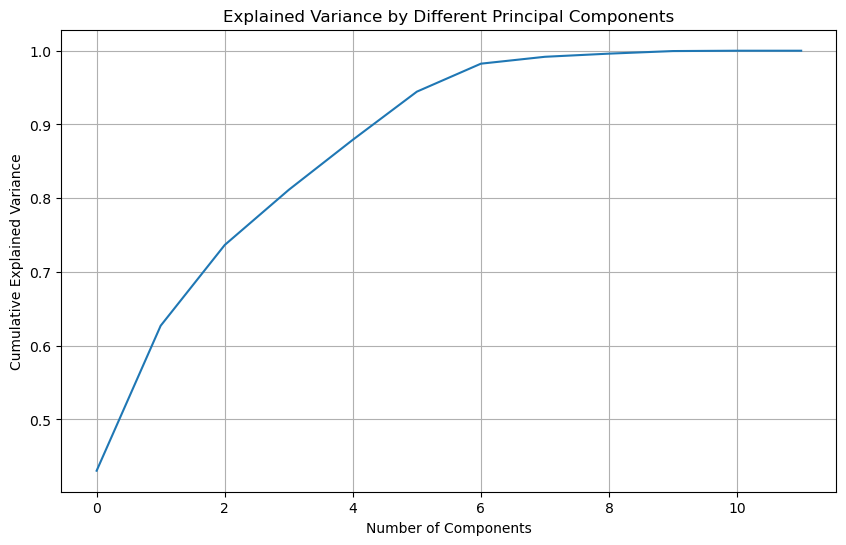

array([0.43044927, 0.62710696, 0.7365747 , 0.81135959, 0.87924668,
       0.9445061 , 0.98243748, 0.99178112, 0.99604319, 0.99954389,
       0.99999368, 1.        ])

In [574]:
# Standardizing the data
scaled_data = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the cumulative explained variance to determine the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()

# Returning the explained variance to aid in interpretation
explained_variance.cumsum()

# Create a DataFrame with the PCA results for easier visualization
pca_columns = ['PC' + str(i+1) for i in range(12)]
pca_df = pd.DataFrame(scaled_data, columns=pca_columns)


# Show the DataFrame with PCA components
pca_df.head()

# Returning the cumulative explained variance for interpretation
explained_variance.cumsum()


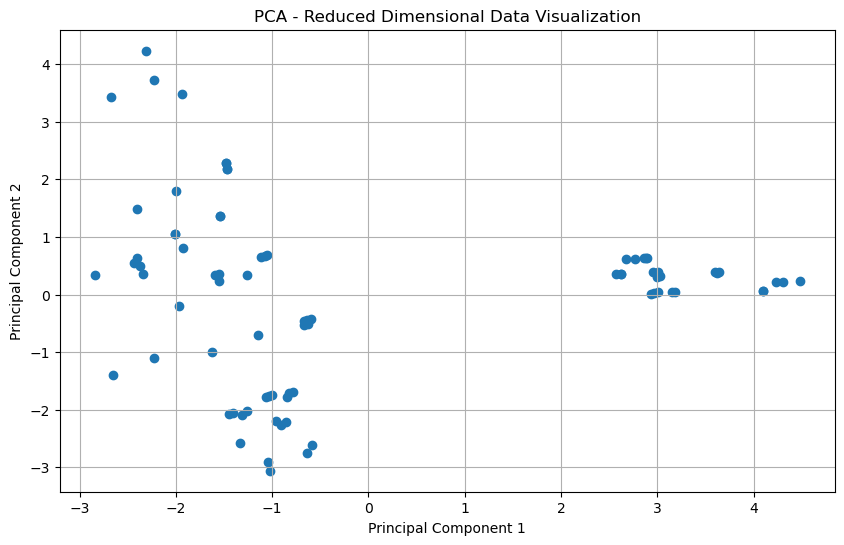

In [571]:
# Applying PCA with the optimal number of components (2 components for visualization)
pca_optimal = PCA(n_components=2)
reduced_data = pca_optimal.fit_transform(X)

# Visualizing the reduced-dimensional data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Reduced Dimensional Data Visualization')
plt.grid(True)
plt.show()


We were able to reduce the feature space from 11 components to 7 components by using PCA

From the graph there appears to be a distinct grouping of fuel types along the first two principal components. The plot shows two clusters with different fuel types, which suggests that PCA has found a linear combination of the original variables that helps to distinguish between these two fuel types.

## Dimensionality Reduction with t-SNE

Implement t-SNE on the same dataset.
Explore different perplexity values and their impact.
Visualize the t-SNE output to reveal patterns and clusters.
Compare t-SNE results with PCA results.

(80, 12)


RESULTS
shape :  (80, 2)
First few points : 
 [[4.0756    3.675461 ]
 [4.41992   3.7224758]]


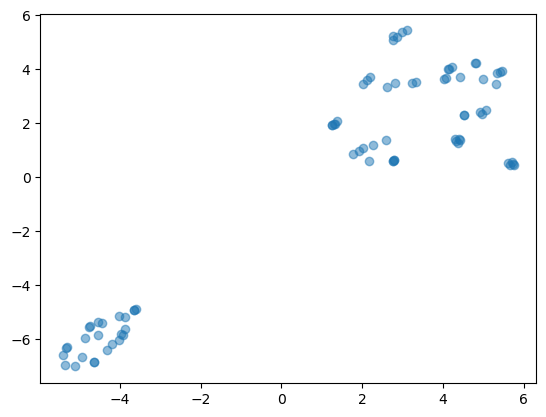

In [572]:
from sklearn.manifold import TSNE

X = record_data
print(X.shape)

# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)

The t-SNE algorithm has successfully reduced the dimensionality of the data and the resulting plot shows the data in two dimensions.
Based on the plot, we can infer that the dataset has some intrinsic clusters or groupings, which could be further analyzed for patterns or similarities.

## Evaluation and Comparison

Evaluate the effectiveness of PCA and t-SNE in terms of preserving data structure and information.
Compare the visualization capabilities of PCA and t-SNE.
Discuss the trade-offs and scenarios where one technique may outperform the other.

## Project Proposal

A brief proposal outlining your project’s objectives, dataset selection, and the tools or libraries you plan to use (e.g., Python, scikit-learn).

## Code Implementation

Python code for implementing PCA and t-SNE on the selected dataset.
Code should include parameter tuning for t-SNE (perplexity) and visualization of the results.

## Project Report

A comprehensive project report detailing the steps taken, results obtained, and your analysis.
Include visualizations, comparisons, and insights gained from the dimensionality reduction techniques.